- this is solution code for capstone project for the **Microsoft Professional Program for Data Science**
- edX course *DAT102x: Data Science Professional Project*

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [3]:
# import data files
X_train = pd.read_csv("data/train_values.csv", index_col="row_id")
y_train = pd.read_csv("data/train_labels.csv", index_col="row_id")
X_test = pd.read_csv("data/test_values.csv", index_col="row_id")

<IPython.core.display.Javascript object>

In [4]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()
print("X_test shape:", X_test.shape)

X_train shape: (8705, 443)
y_train shape: (8705, 1)

X_test shape: (6391, 443)


<IPython.core.display.Javascript object>

In [5]:
row_id = X_test.index

<IPython.core.display.Javascript object>

# Analyze the Data

#### repayment_rate summary statistics

Based on your analysis of the original, unmodified training data, enter the following summary statistics you calculated for the `repayment_rate` column.

In [6]:
print("Minimum repayment_rate:", y_train.repayment_rate.min())
print("Maximum repayment_rate:", y_train.repayment_rate.max())
print("Mean repayment_rate:", y_train.repayment_rate.mean())
print("Median repayment_rate:", y_train.repayment_rate.median())
print("Standard Deviation of repayment_rate:", y_train.repayment_rate.std())

Minimum repayment_rate: 5.162707558220717
Maximum repayment_rate: 100.47363087310478
Mean repayment_rate: 47.3708628512851
Median repayment_rate: 44.855045202386776
Standard Deviation of repayment_rate: 20.987641995662944


<IPython.core.display.Javascript object>

#### Distribution of `repayment_rate`.

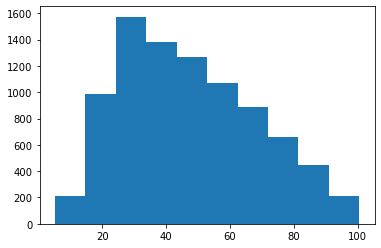

<IPython.core.display.Javascript object>

In [7]:
# plot repayment_rate histogram
plt.show(plt.hist(y_train.repayment_rate))

#### School Ownership vs Repayment Rate

Which two of the following statements are true:
  - 1) The median repayment rate for privately owned for-profit schools is higher than that of privately owned not-for-profit schools.
  - 2) The median repayment rate for privately owned not-for-profit schools is higher than that of public schools.
  - 3) The median repayment rate for public schools is higher than that of privately owned for-profit schools.

In [8]:
# find columns containing "own" to get relevant column
own_columns = [col for col in X_train.columns if "own" in col]
print(*own_columns, sep="\n")

completion__completion_rate_4yr_150_race_unknown
completion__completion_rate_l4yr_150_race_unknown
school__ownership
student__demographics_race_ethnicity_unknown


<IPython.core.display.Javascript object>

In [9]:
print(y_train.repayment_rate.groupby(X_train.school__ownership).median().sort_values())

school__ownership
Private for-profit    33.242106
Public                52.392471
Private nonprofit     67.492957
Name: repayment_rate, dtype: float64


<IPython.core.display.Javascript object>

In [10]:
Private_for_profit = (
    y_train.repayment_rate.groupby(X_train.school__ownership)
    .median()
    .loc["Private for-profit"]
)
Public = (
    y_train.repayment_rate.groupby(X_train.school__ownership).median().loc["Public"]
)
Private_nonprofit = (
    y_train.repayment_rate.groupby(X_train.school__ownership)
    .median()
    .loc["Private nonprofit"]
)

print("Statement 1:", Private_for_profit > Private_nonprofit)
print("Statement 2:", Private_nonprofit > Public)
print("Statement 3:", Public > Private_for_profit)

Statement 1: False
Statement 2: True
Statement 3: True


<IPython.core.display.Javascript object>

#### SAT Scores vs Repayment Rate

Which of the following best describes the apparent relationship between SAT scores and repayment rates?
  - 1) Schools that admit students with a higher average overall SAT score tend to have a lower repayment rate.
  - 2) Schools that admit students with a higher average overall SAT score tend to have a higher repayment rate.
  - 3) Average overall SAT score for school admissions has no discernible relationship with repayment rate.

In [11]:
# find columns containing "sat" to get relevant column
sat_columns = [col for col in X_train.columns if "sat" in col]
print(*sat_columns, sep="\n")

admissions__sat_scores_25th_percentile_critical_reading
admissions__sat_scores_25th_percentile_math
admissions__sat_scores_25th_percentile_writing
admissions__sat_scores_75th_percentile_critical_reading
admissions__sat_scores_75th_percentile_math
admissions__sat_scores_75th_percentile_writing
admissions__sat_scores_average_by_ope_id
admissions__sat_scores_average_overall
admissions__sat_scores_midpoint_critical_reading
admissions__sat_scores_midpoint_math
admissions__sat_scores_midpoint_writing


<IPython.core.display.Javascript object>

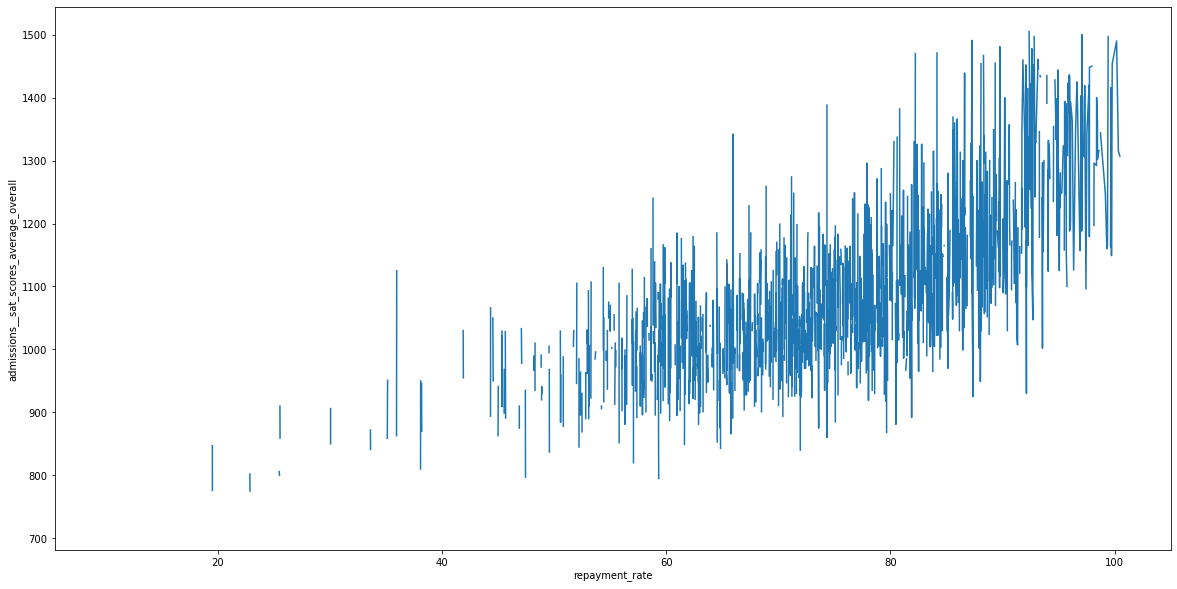

<IPython.core.display.Javascript object>

In [12]:
X_train_sorted, y_train_sorted = zip(
    *sorted(zip(y_train.repayment_rate, X_train.admissions__sat_scores_average_overall))
)

# plot relationship between SAT scores and repayment rates
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(X_train_sorted, y_train_sorted)
plt.ylabel("admissions__sat_scores_average_overall")
plt.xlabel("repayment_rate")
plt.show()

Answer: 2) Schools that admit students with a higher average overall SAT score tend to have a higher repayment rate.

####  Median Family Income vs Repayment Rate


Which of the following best describes the apparent relationship between median family income and repayment rates?
  - 1) Schools where students have a low median family income tend to have a low repayment rate.
  - 2) Schools where students have a low median family income tend to have a high repayment rate.
  - 3) Median family income has no discernible relationship with repayment rate.

In [13]:
# find columns containing "family_income" to get relevant column
family_income_columns = [col for col in X_train.columns if "family_income" in col]
print(*family_income_columns, sep="\n")

student__demographics_avg_family_income
student__demographics_avg_family_income_independents
student__demographics_median_family_income
student__family_income_dependent_students
student__family_income_independent_students
student__family_income_overall


<IPython.core.display.Javascript object>

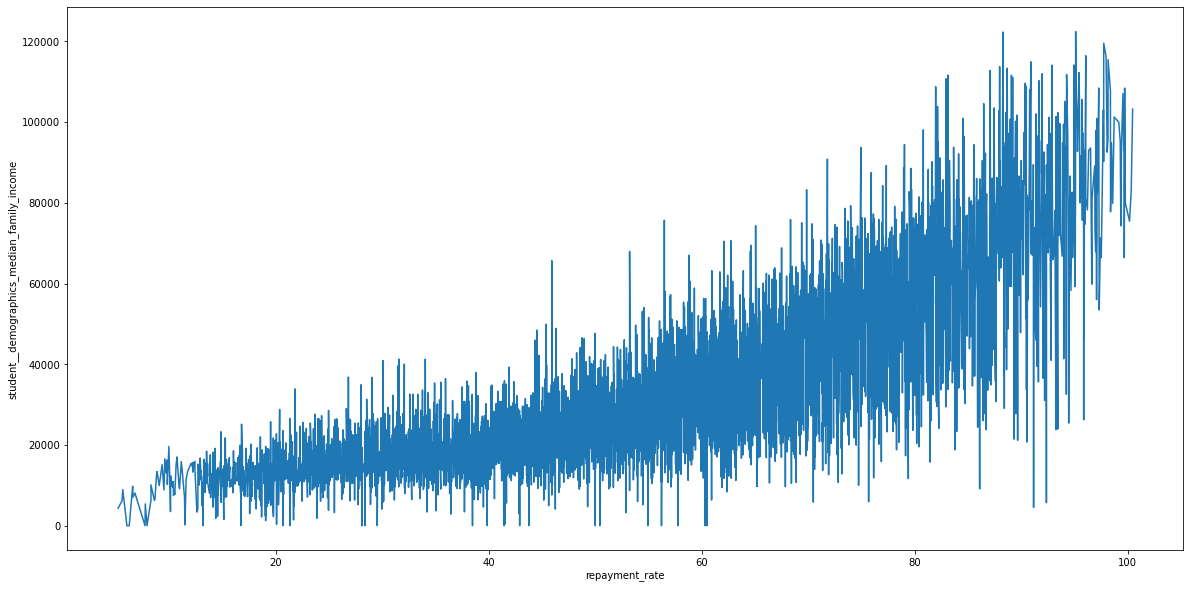

<IPython.core.display.Javascript object>

In [14]:
X_train_sorted, y_train_sorted = zip(
    *sorted(
        zip(y_train.repayment_rate, X_train.student__demographics_median_family_income)
    )
)

# plot relationship between between median family income and repayment rates
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.ylabel("student__demographics_median_family_income")
plt.xlabel("repayment_rate")
plt.plot(X_train_sorted, y_train_sorted)
plt.show()

Answer: 1) Schools where students have a low median family income tend to have a low repayment rate.

#### School Region vs Repayment rate

Which of the following school regions has the highest median repayment rate?
  - 1) Great Lakes
  - 2) Far West
  - 3) New England
  - 4) Rocky Mountains

In [15]:
# find columns containing "region" to get relevant column
region_columns = [col for col in X_train.columns if "region" in col]
print(*region_columns, sep="\n")

school__region_id


<IPython.core.display.Javascript object>

In [16]:
print(y_train.repayment_rate.groupby(X_train.school__region_id).median().sort_values())

school__region_id
Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)    34.979262
Southwest (AZ, NM, OK, TX)                                    35.721824
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)               39.844847
Far West (AK, CA, HI, NV, OR, WA)                             43.874565
Great Lakes (IL, IN, MI, OH, WI)                              45.356757
Rocky Mountains (CO, ID, MT, UT, WY)                          47.890840
Mid East (DE, DC, MD, NJ, NY, PA)                             54.069880
Plains (IA, KS, MN, MO, NE, ND, SD)                           54.133111
New England (CT, ME, MA, NH, RI, VT)                          62.002451
U.S. Service Schools                                          90.755288
Name: repayment_rate, dtype: float64


<IPython.core.display.Javascript object>

Answer: 3) New England

# Challenge - Predicting Student Loan Repayment Rate

In [17]:
X_train.select_dtypes(["object"]).columns

Index(['report_year', 'school__carnegie_basic',
       'school__carnegie_size_setting', 'school__carnegie_undergrad',
       'school__degrees_awarded_highest',
       'school__degrees_awarded_predominant',
       'school__institutional_characteristics_level', 'school__locale',
       'school__main_campus', 'school__men_only',
       'school__minority_serving_aanipi', 'school__minority_serving_annh',
       'school__minority_serving_hispanic',
       'school__minority_serving_historically_black',
       'school__minority_serving_nant',
       'school__minority_serving_predominantly_black',
       'school__minority_serving_tribal', 'school__online_only',
       'school__ownership', 'school__region_id',
       'school__religious_affiliation', 'school__state', 'school__women_only'],
      dtype='object')

<IPython.core.display.Javascript object>

In [18]:
print("agriculture: ", X_train.academics__program_assoc_agriculture.unique())
print("architecture: ", X_train.academics__program_assoc_architecture.unique())
print("biological: ", X_train.academics__program_assoc_biological.unique())
print("marketing: ", X_train.academics__program_assoc_business_marketing.unique())

agriculture:  [ 0.  1. nan  2.]
architecture:  [ 0. nan  1.  2.]
biological:  [ 0. nan  1.  2.]
marketing:  [ 2.  0.  1. nan]


<IPython.core.display.Javascript object>

In [19]:
object_cols = X_train.select_dtypes("object").columns
float_cols = X_train.select_dtypes("float64").columns

d1 = dict((col, "") for col in object_cols)
d2 = dict((col, 0) for col in float_cols)
X_train = X_train.fillna(value=dict(d1, **d2))

<IPython.core.display.Javascript object>

In [20]:
print(X_train.shape)
print(X_test.shape)

print("Float:", X_train.loc[:, X_train.dtypes == float].shape)
print("Float:", X_test.loc[:, X_test.dtypes == float].shape)

(8705, 443)
(6391, 443)
Float: (8705, 419)
Float: (6391, 419)


<IPython.core.display.Javascript object>

In [21]:
object_cols_test = X_test.select_dtypes("object").columns
float_cols_test = X_test.select_dtypes("float64").columns

d1_test = dict((col, "") for col in object_cols_test)
d2_test = dict((col, 0) for col in float_cols_test)
X_test = X_test.fillna(value=dict(d1_test, **d2_test))

<IPython.core.display.Javascript object>

In [22]:
print(X_train.shape)
print(X_test.shape)

print("Float:", X_train.loc[:, X_train.dtypes == float].shape)
print("Float:", X_test.loc[:, X_test.dtypes == float].shape)

(8705, 443)
(6391, 443)
Float: (8705, 419)
Float: (6391, 419)


<IPython.core.display.Javascript object>

In [23]:
X_train.loc[:, X_train.dtypes == float] = X_train.loc[
    :, X_train.dtypes == float
].fillna(0)
X_test.loc[:, X_test.dtypes == float] = X_test.loc[:, X_test.dtypes == float].fillna(0)

<IPython.core.display.Javascript object>

In [24]:
print(X_train.loc[:, X_train.dtypes == float].shape)
print(X_test.loc[:, X_test.dtypes == float].shape)

(8705, 419)
(6391, 419)


<IPython.core.display.Javascript object>

In [25]:
scaler = StandardScaler()

# Don't cheat - fit only on training data
scaler = scaler.fit(X_train.loc[:, X_train.dtypes == float])
X_train = scaler.transform(X_train.loc[:, X_train.dtypes == float])
# X_test = scaler.transform(X_test.loc[:, X_test.dtypes == float])

<IPython.core.display.Javascript object>

In [26]:
X_test = scaler.transform(X_test.loc[:, X_test.dtypes == float])

<IPython.core.display.Javascript object>

In [27]:
print(X_train.shape)
print(X_test.shape)

(8705, 419)
(6391, 419)


<IPython.core.display.Javascript object>

In [28]:
data_train, data_test, label_train, label_test = train_test_split(
    X_train, y_train, test_size=0.7, random_state=7
)

<IPython.core.display.Javascript object>

In [29]:
# Train best model on full train dataset
from sklearn import ensemble

params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 3,
    "learning_rate": 0.05,
    "loss": "ls",
    "criterion": "mse",
}
model = ensemble.GradientBoostingRegressor(**params)

print("Fitting...")
start_time = time.time()

model.fit(X_train, y_train.values.ravel())

end_time = time.time()
print("Fitting completed in: ", end_time - start_time)

print(model)

mse_train_data = mean_squared_error(y_train, model.predict(X_train))
mrse_train_data = mean_squared_error(y_train, model.predict(X_train)) ** 0.5

print("MSE on train data: %f" % mse_train_data)
print("MRSE on train data: %f" % mrse_train_data)
print("Score on train data:", (model.score(X_train, y_train)) * 100, "%")

Fitting...
Fitting completed in:  246.0208797454834
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE on train data: 13.786643
MRSE on train data: 3.713037
Score on train data: 96.86973487157982 %


<IPython.core.display.Javascript object>

In [30]:
prediction = model.predict(X_test)

<IPython.core.display.Javascript object>

In [31]:
result = pd.DataFrame({"row_id": row_id, "repayment_rate": prediction})
result_cols = result.columns.tolist()
result_cols = result_cols[-1:] + result_cols[:-1]
result = result[result_cols]
result = result.set_index(row_id)

del result["row_id"]
result

,repayment_rate
row_id,
0,48.207136
1,42.094610
2,33.437984
9,88.196251
10,76.628230
...,...
15079,54.445311
15082,47.389777
15087,37.569235


<IPython.core.display.Javascript object>

In [32]:
result.to_csv("./result.csv")

<IPython.core.display.Javascript object>